In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image

In [2]:
data_dir = "/content/drive/MyDrive/VR Gallery Art"
batch_size = 32
img_size = (224, 224)

In [3]:
datagen = ImageDataGenerator(rescale=1./255, vertical_flip = True, horizontal_flip= True, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 244 images belonging to 4 classes.
Found 59 images belonging to 4 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
7/7 [==============================] - 87s 11s/step - loss: 1.3109 - accuracy: 0.4009 - val_loss: 1.2618 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 31s 4s/step - loss: 0.9018 - accuracy: 0.5580 - val_loss: 0.8461 - val_accuracy: 0.4688
Epoch 3/10
7/7 [==============================] - 29s 4s/step - loss: 0.7506 - accuracy: 0.6792 - val_loss: 0.9284 - val_accuracy: 0.6250
Epoch 4/10
7/7 [==============================] - 29s 4s/step - loss: 0.6722 - accuracy: 0.7123 - val_loss: 0.4781 - val_accuracy: 0.8438
Epoch 5/10
7/7 [==============================] - 29s 4s/step - loss: 0.5353 - accuracy: 0.8019 - val_loss: 0.6080 - val_accuracy: 0.7188
Epoch 6/10
7/7 [==============================] - 29s 4s/step - loss: 0.4917 - accuracy: 0.7946 - val_loss: 0.9842 - val_accuracy: 0.6250
Epoch 7/10
7/7 [==============================] - 28s 4s/step - loss: 0.6062 - accuracy: 0.7500 - val_loss: 0.4199 - val_accuracy: 0.8438
Epoch 8/10
7/7 [=================

In [7]:
# evaluate the model on the test set
loss, accuracy = model.evaluate(validation_generator, steps=len(validation_generator))

# print the metrics
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 2s 732ms/step - loss: 0.4478 - accuracy: 0.8305
Test loss: 0.44776633381843567
Test accuracy: 0.8305084705352783


In [8]:
# Define the file path for saving the model
model_path = '/content/drive/MyDrive/MyModel.h5'

# Save the model
model.save(model_path)

In [9]:
#extract features of all images from dataset
features_list = model.predict(train_generator, steps=len(train_generator))

8/8 [==============================] - 10s 1s/step


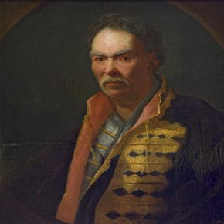

1/1 [==============================] - 0s 134ms/step
Portrait


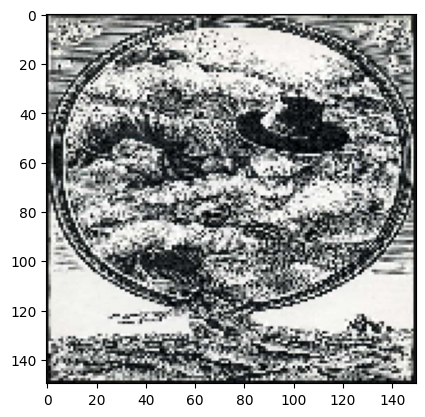

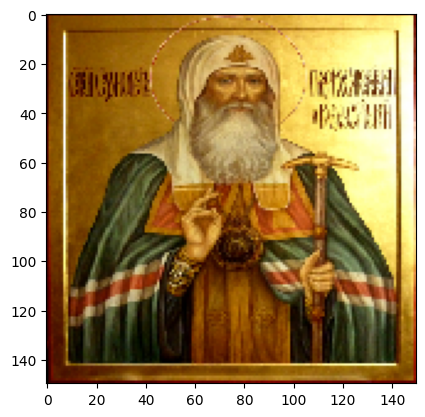

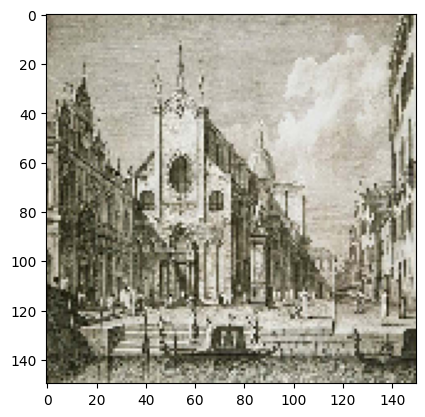

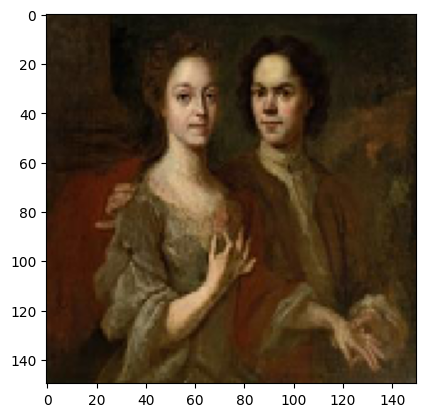

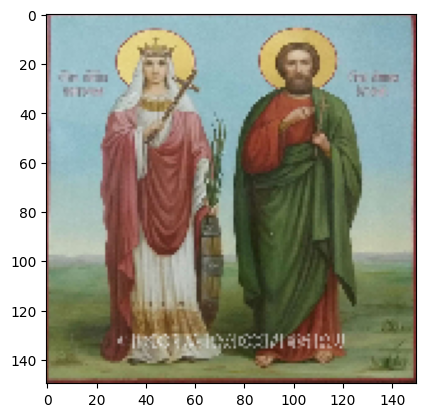

In [10]:

#Load Image from Directory
img = load_img('/content/drive/MyDrive/VR Gallery Art/Portrait/1391.jpg', target_size=(224, 224))
img.show()
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape((1,) + img_array.shape)

#Extract features of input image
features = model.predict(img_array)

#Predict class of input image
predicted_class = np.argmax(features)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]
print(predicted_label)


# Calculate the cosine similarity between the input image features and all the other image features
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(features, features_list)

# Get the top 5 similar images
indices = cos_sim.argsort()[0][-6:-1]
similar_images = [train_generator.filenames[i] for i in indices]

# Display the top 5 similar images
import matplotlib.pyplot as plt
for img_path in similar_images:
    img = image.load_img(data_dir + '/' + img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()